In [1]:
#import modules
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Read in data and show data frame
data_loans = pd.read_csv("LoanStats3d.csv", header=1)
data_loans

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,66310712,71035433.0,35000.0,35000.0,35000.0,60 months,14.85%,829.90,C,C5,...,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
1,68476807,73366655.0,10400.0,10400.0,10400.0,60 months,22.45%,289.91,F,F1,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
2,68341763,72928789.0,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
4,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
5,68577849,73467703.0,18000.0,18000.0,18000.0,60 months,11.99%,400.31,C,C1,...,0.0,4.0,100.0,0.0,0.0,0.0,309710.0,36127.0,69800.0,26210.0
6,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
7,68506798,73396623.0,23000.0,23000.0,23000.0,60 months,8.49%,471.77,B,B1,...,0.0,2.0,87.9,14.3,0.0,0.0,93962.0,63886.0,39500.0,46662.0
8,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0
9,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0


In [3]:
list(data_loans.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [4]:
#use annual income, debt-to-income, interest rate, loan term, funded amount and home ownership
#only regular annual income not joint = 'annual_inc'
#debt to income = 'dti'
#'int_rate' = interest rate
# 'term' = loan term
# 'funded_amnt' = funded amount
# 'home_ownership' = home ownership



In [5]:
df = data_loans[['annual_inc','dti','int_rate','term','funded_amnt','home_ownership','loan_status']]
df.head()

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status
0,110000.0,17.06,14.85%,60 months,35000.0,MORTGAGE,Current
1,104433.0,25.37,22.45%,60 months,10400.0,MORTGAGE,Fully Paid
2,63000.0,10.78,10.78%,60 months,20000.0,MORTGAGE,Current
3,109000.0,26.02,7.49%,36 months,25000.0,MORTGAGE,Fully Paid
4,92000.0,21.60,6.49%,36 months,28000.0,MORTGAGE,Current


In [6]:
#get rid of loans that are current
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Default')| (df['loan_status'] == 'Charged Off')]
df.loan_status.value_counts()
#full paid = good
# charged off = bad
# Late = bad
# In Grace Period = bad
# Default = Bad



Fully Paid     76833
Charged Off    24239
Default           80
Name: loan_status, dtype: int64

In [7]:
def gnbloans (x):
    if x == 'Fully Paid':
        return 1
    else:
        return 0

 


In [8]:
df['good_or_bad'] = df['loan_status'].apply(gnbloans)
df.head()

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status,good_or_bad
1,104433.0,25.37,22.45%,60 months,10400.0,MORTGAGE,Fully Paid,1
3,109000.0,26.02,7.49%,36 months,25000.0,MORTGAGE,Fully Paid,1
5,112000.0,8.68,11.99%,60 months,18000.0,MORTGAGE,Fully Paid,1
8,55000.0,25.49,19.89%,36 months,8650.0,RENT,Fully Paid,1
18,180000.0,14.67,9.17%,36 months,20000.0,MORTGAGE,Fully Paid,1


In [9]:
df['int_rate'].values
def ridpercent (rid):
    if '%' in str(rid):
        return str(rid).strip('%').replace(" ","")
    else:
        return rid
df['bye_percent'] = df['int_rate'].apply(ridpercent)
df['int_rate'] = df['int_rate'].apply(ridpercent).astype(np.float64)/100
df = df.drop('bye_percent', axis = 1)



    
    

In [10]:
termdum_var = pd.get_dummies(df['term'])
homeowndum_var = pd.get_dummies(df['home_ownership'])


df = pd.concat([df, termdum_var, homeowndum_var], axis = 1)
df

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status,good_or_bad,36 months,60 months,MORTGAGE,OWN,RENT
1,104433.0,25.37,0.2245,60 months,10400.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
3,109000.0,26.02,0.0749,36 months,25000.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
5,112000.0,8.68,0.1199,60 months,18000.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
8,55000.0,25.49,0.1989,36 months,8650.0,RENT,Fully Paid,1,1.0,0.0,0.0,0.0,1.0
18,180000.0,14.67,0.0917,36 months,20000.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
20,65000.0,16.06,0.1199,36 months,24700.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
27,88000.0,26.59,0.0532,36 months,17600.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
29,109000.0,23.35,0.1797,60 months,16000.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
33,75000.0,20.84,0.2424,60 months,24250.0,MORTGAGE,Default,0,0.0,1.0,1.0,0.0,0.0
37,195000.0,6.79,0.1485,60 months,27500.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0


In [11]:
# df_test = df[:]

In [12]:
df.good_or_bad.value_counts()

1    76833
0    24319
Name: good_or_bad, dtype: int64

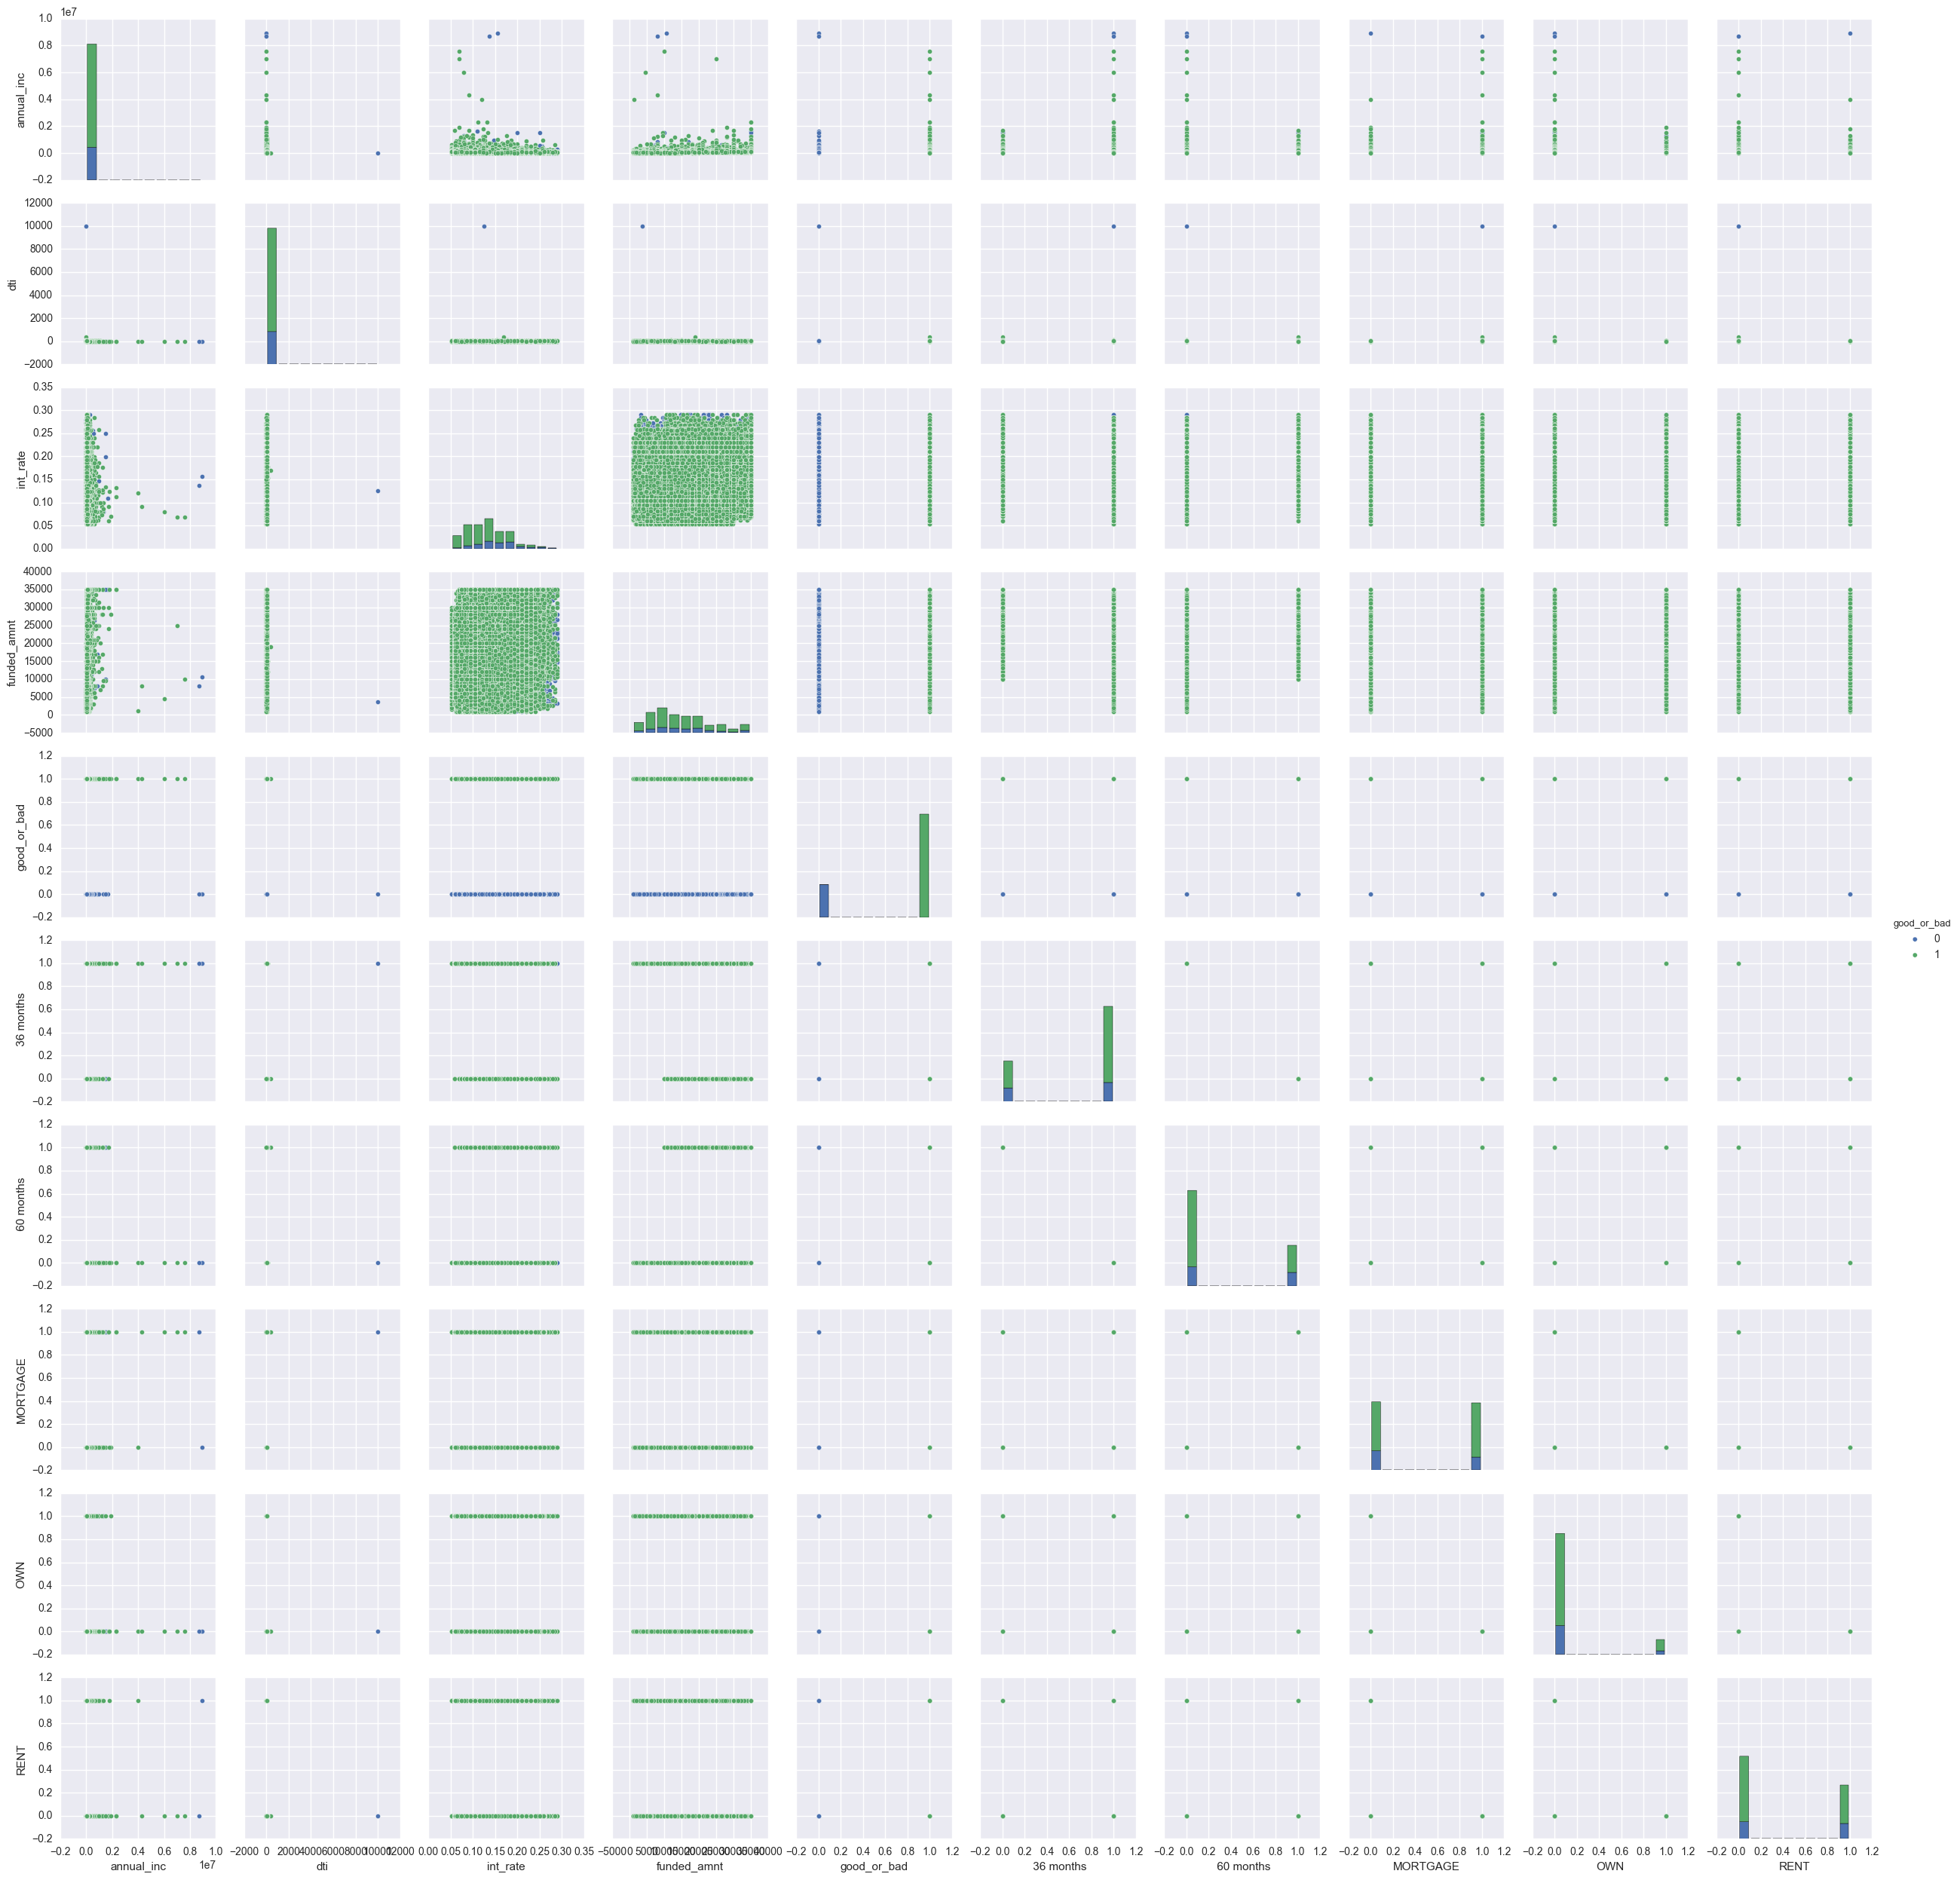

In [13]:
sns.pairplot(df, hue = 'good_or_bad')

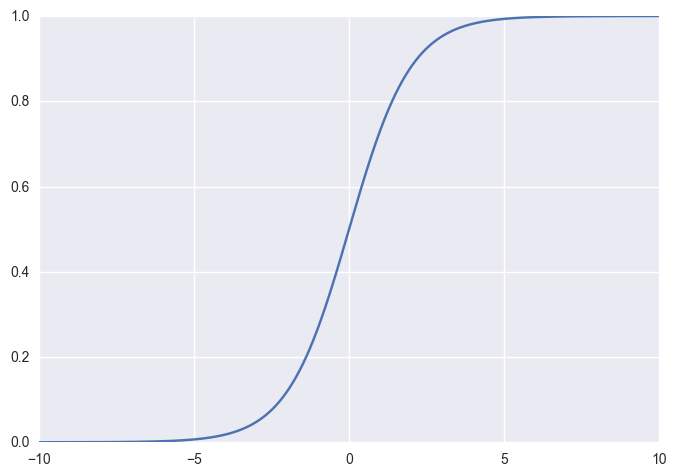

In [14]:
#shows what the function is doing to this data
sigmoid = np.vectorize(lambda x: 1./(1+np.exp(-x)))
X = np.arange(-10,10,0.01)
plt.plot(X,sigmoid(X))

In [20]:
#dummy normalization because used sigmoid function which only takes values between 0 and 1
min_val = df['annual_inc'].min()
max_val = df['annual_inc'].max()

def min_max(x):
    return (x-min_val)/(max_val-min_val)

df['annual_inc'].apply(min_max)


1         0.011734
3         0.012247
5         0.012584
8         0.006180
18        0.020225
20        0.007303
27        0.009888
29        0.012247
33        0.008427
37        0.021910
59        0.005618
81        0.009550
83        0.012359
86        0.003371
88        0.015168
90        0.006039
94        0.012359
104       0.011685
114       0.010337
117       0.006742
119       0.008238
124       0.013483
125       0.006607
133       0.005618
135       0.003146
141       0.007640
150       0.007079
152       0.001685
158       0.008427
160       0.009213
            ...   
421004    0.013483
421017    0.003933
421019    0.011685
421020    0.004719
421022    0.005369
421024    0.004719
421033    0.003933
421035    0.003595
421043    0.012135
421048    0.008427
421049    0.007753
421053    0.005506
421054    0.022472
421055    0.013483
421059    0.013483
421060    0.004719
421063    0.007087
421068    0.005393
421071    0.005843
421076    0.006180
421079    0.004494
421081    0.

In [21]:
min_val = df['dti'].min()
max_val = df['dti'].max()

df['dti'].apply(min_max)


1         0.002537
3         0.002602
5         0.000868
8         0.002549
18        0.001467
20        0.001606
27        0.002659
29        0.002335
33        0.002084
37        0.000679
59        0.001925
81        0.001500
83        0.001324
86        0.003084
88        0.000465
90        0.001530
94        0.002043
104       0.001401
114       0.001389
117       0.000330
119       0.001702
124       0.003569
125       0.002045
133       0.001486
135       0.002795
141       0.003168
150       0.003519
152       0.003720
158       0.003865
160       0.001507
            ...   
421004    0.003121
421017    0.000262
421019    0.000793
421020    0.002674
421022    0.001469
421024    0.001671
421033    0.000830
421035    0.001140
421043    0.001247
421048    0.002335
421049    0.000823
421053    0.002258
421054    0.002682
421055    0.001740
421059    0.002660
421060    0.001066
421063    0.003170
421068    0.003693
421071    0.001128
421076    0.000552
421079    0.002565
421081    0.

In [22]:
min_val = df['int_rate'].min()
max_val = df['int_rate'].max()

df['int_rate'].apply(min_max)

1         0.723701
3         0.091677
5         0.281791
8         0.615547
18        0.162653
20        0.281791
27        0.000000
29        0.534432
33        0.799324
37        0.402619
59        0.162653
81        0.049430
83        0.133925
86        0.476130
88        0.260245
90        0.000000
94        0.641318
104       0.230672
114       0.189269
117       0.319392
119       0.598226
124       0.641318
125       0.476130
133       0.000000
135       0.441487
141       0.876215
150       0.230672
152       0.534432
158       0.556401
160       0.281791
            ...   
421004    0.258555
421017    0.433883
421019    0.091677
421020    0.529785
421022    0.529785
421024    0.218420
421033    0.788762
421035    0.471905
421043    0.619772
421048    0.298690
421049    0.450782
421053    0.379806
421054    0.121251
421055    0.662019
421059    0.433883
421060    0.218420
421063    0.450782
421068    0.450782
421071    0.529785
421076    0.433883
421079    0.176172
421081    0.

In [23]:
min_val = df['funded_amnt'].min()
max_val = df['funded_amnt'].max()
df['funded_amnt'].apply(min_max)

1         0.276471
3         0.705882
5         0.500000
8         0.225000
18        0.558824
20        0.697059
27        0.488235
29        0.441176
33        0.683824
37        0.779412
59        0.182353
81        0.294118
83        0.411765
86        0.264706
88        0.705882
90        0.323529
94        0.650000
104       0.958824
114       0.411765
117       0.264706
119       0.394118
124       1.000000
125       0.440441
133       0.205882
135       0.250000
141       0.730147
150       0.441176
152       0.191176
158       0.570588
160       0.588235
            ...   
421004    1.000000
421017    0.079412
421019    0.617647
421020    0.323529
421022    0.050735
421024    0.429412
421033    0.264706
421035    0.264706
421043    0.471324
421048    0.411765
421049    0.382353
421053    0.547059
421054    0.441176
421055    0.508088
421059    0.794118
421060    0.147059
421063    0.470588
421068    0.094118
421071    0.520588
421076    0.705882
421079    0.323529
421081    0.

In [25]:
df

,annual_inc,dti,int_rate,term,funded_amnt,home_ownership,loan_status,good_or_bad,36 months,60 months,MORTGAGE,OWN,RENT
1,104433.0,25.37,0.2245,60 months,10400.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
3,109000.0,26.02,0.0749,36 months,25000.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
5,112000.0,8.68,0.1199,60 months,18000.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
8,55000.0,25.49,0.1989,36 months,8650.0,RENT,Fully Paid,1,1.0,0.0,0.0,0.0,1.0
18,180000.0,14.67,0.0917,36 months,20000.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
20,65000.0,16.06,0.1199,36 months,24700.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
27,88000.0,26.59,0.0532,36 months,17600.0,MORTGAGE,Fully Paid,1,1.0,0.0,1.0,0.0,0.0
29,109000.0,23.35,0.1797,60 months,16000.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
33,75000.0,20.84,0.2424,60 months,24250.0,MORTGAGE,Default,0,0.0,1.0,1.0,0.0,0.0
37,195000.0,6.79,0.1485,60 months,27500.0,MORTGAGE,Fully Paid,1,0.0,1.0,1.0,0.0,0.0
